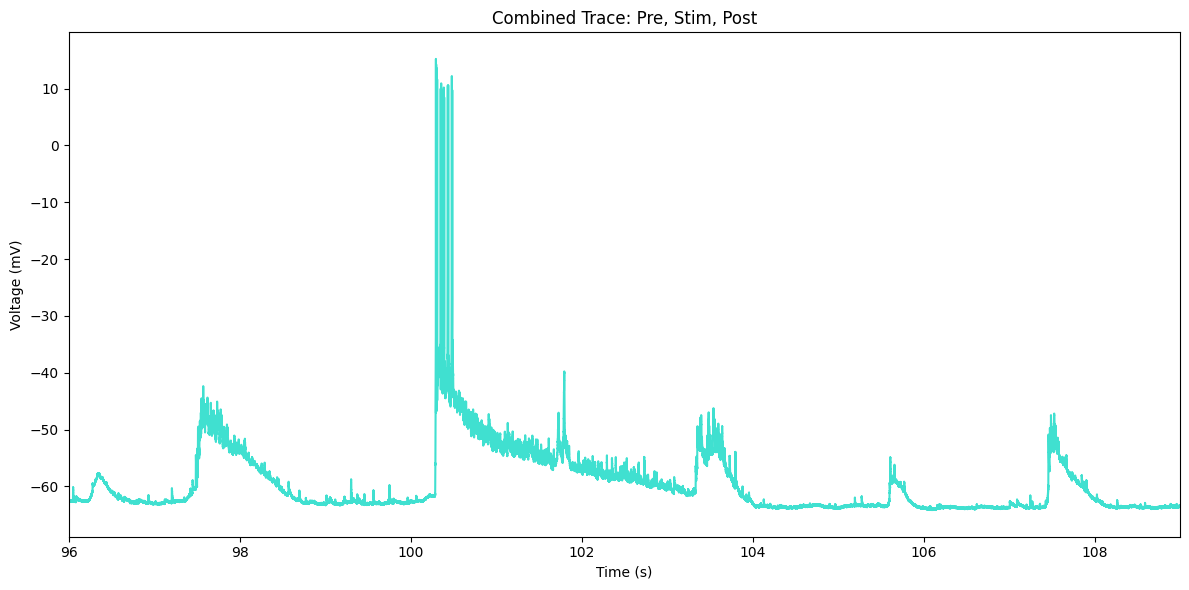

In [16]:
# Load the pre, stim, and post ABF files
#example for control
pre_file_path = r'C:\Maha\DATA\patch_clamp\Kevin\synaptic_connectivity\control\100624_F1_C1\CC\t1\24610007.abf'  # Update with your pre file path
stim_file_path = r'C:\Maha\DATA\patch_clamp\Kevin\synaptic_connectivity\control\100624_F1_C1\CC\t1\24610008.abf'  # Update with your stim file path
post_file_path = r'C:\Maha\DATA\patch_clamp\Kevin\synaptic_connectivity\control\100624_F1_C1\CC\t1\24610009.abf'  # Update with your post file path

# Function to concatenate all sweeps from a given ABF file
def concatenate_sweeps(abf_file_path):
    abf = pyabf.ABF(abf_file_path)
    concatenated_trace = []
    concatenated_time = []

    for sweepNumber in range(abf.sweepCount):
        abf.setSweep(sweepNumber)
        concatenated_trace.append(abf.sweepY)
        concatenated_time.append(abf.sweepX + (abf.sweepX[-1] * sweepNumber))  # Adjust time for concatenation

    return np.concatenate(concatenated_time), np.concatenate(concatenated_trace)

# Concatenate all sweeps for pre and post
pre_time, pre_trace = concatenate_sweeps(pre_file_path)
post_time, post_trace = concatenate_sweeps(post_file_path)

# Load the stim trace (assuming it has only one sweep)
stim_abf = pyabf.ABF(stim_file_path)
stim_abf.setSweep(0)
stim_time = stim_abf.sweepX + pre_time[-1]  # Adjust time to continue from end of pre
stim_trace = stim_abf.sweepY

# Adjust post time to continue from the end of stim
post_time += stim_time[-1]

# Combine pre, stim, and post traces
combined_time = np.concatenate([pre_time, stim_time, post_time])
combined_trace = np.concatenate([pre_trace, stim_trace, post_trace])

# Plot the combined trace
plt.figure(figsize=(12, 6))
plt.plot(combined_time, combined_trace, color='turquoise')
plt.title('Combined Trace: Pre, Stim, Post')
plt.xlabel('Time (s)')
plt.ylabel('Voltage (mV)')
plt.tight_layout()
plt.xlim(96,109)


# Save the combined trace plot
output_path = r'C:\Maha\DATA\patch_clamp\Kevin\synaptic_connectivity\figures' # Update with your output directory
plt.savefig(os.path.join(output_path, 'combined_trace_control_zoom.svg'))
#plt.savefig(os.path.join(output_path, 'combined_trace.pdf'))
plt.show()

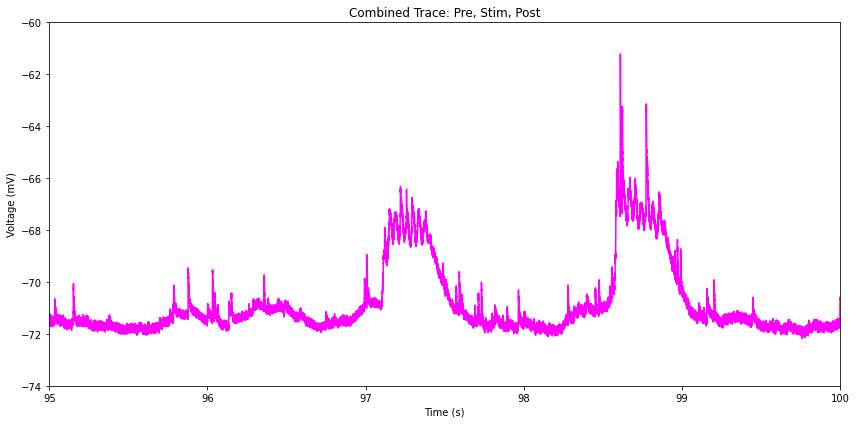

In [14]:
# Load the pre, stim, and post ABF files
# example for opsin
pre_file_path = r'C:\Maha\DATA\patch_clamp\Kevin\synaptic_connectivity\opsin\140524_F1_C1\CC\t1\24514026.abf'  # Update with your pre file path
stim_file_path = r'C:\Maha\DATA\patch_clamp\Kevin\synaptic_connectivity\opsin\140524_F1_C1\CC\t1\24514027.abf'  # Update with your stim file path
post_file_path = r'C:\Maha\DATA\patch_clamp\Kevin\synaptic_connectivity\opsin\140524_F1_C1\CC\t1\24514028.abf'  # Update with your post file path

# Function to concatenate all sweeps from a given ABF file
def concatenate_sweeps(abf_file_path):
    abf = pyabf.ABF(abf_file_path)
    concatenated_trace = []
    concatenated_time = []

    for sweepNumber in range(abf.sweepCount):
        abf.setSweep(sweepNumber)
        concatenated_trace.append(abf.sweepY)
        concatenated_time.append(abf.sweepX + (abf.sweepX[-1] * sweepNumber))  # Adjust time for concatenation

    return np.concatenate(concatenated_time), np.concatenate(concatenated_trace)

# Concatenate all sweeps for pre and post
pre_time, pre_trace = concatenate_sweeps(pre_file_path)
post_time, post_trace = concatenate_sweeps(post_file_path)

# Load the stim trace (assuming it has only one sweep)
stim_abf = pyabf.ABF(stim_file_path)
stim_abf.setSweep(0)
stim_time = stim_abf.sweepX + pre_time[-1]  # Adjust time to continue from end of pre
stim_trace = stim_abf.sweepY

# Adjust post time to continue from the end of stim
post_time += stim_time[-1]

# Combine pre, stim, and post traces
combined_time = np.concatenate([pre_time, stim_time, post_time])
combined_trace = np.concatenate([pre_trace, stim_trace, post_trace])

# Plot the combined trace
plt.figure(figsize=(12, 6))
plt.plot(combined_time, combined_trace, color='magenta')
plt.title('Combined Trace: Pre, Stim, Post')
plt.xlabel('Time (s)')
plt.ylabel('Voltage (mV)')
plt.tight_layout()
plt.xlim(95,100)
plt.ylim(-74,-60)


# Save the combined trace plot
output_path = r'C:\Maha\DATA\patch_clamp\Kevin\synaptic_connectivity' # Update with your output directory
plt.savefig(os.path.join(output_path, 'pre_opto_trace.png'))
plt.savefig(os.path.join(output_path, 'pre_opto_trace.svg'))
plt.show()

# combining

In [2]:
import os
import pandas as pd

# Define the root directory
root_directory = r'C:\Maha\DATA\patch_clamp\Kevin\synaptic_connectivity'

# Initialize an empty list to store DataFrames
df_list = []

# Walk through all the directories and subdirectories
for dirpath, dirnames, filenames in os.walk(root_directory):
    for file in filenames:
        if file == "unknown_event_rate_results.csv":
            file_path = os.path.join(dirpath, file)
            # Read the CSV file into a DataFrame
            df = pd.read_csv(file_path)
            # Append the DataFrame to the list
            df_list.append(df)

# Combine all DataFrames into a single DataFrame
combined_df = pd.concat(df_list, ignore_index=True)

# Save the combined DataFrame to a new CSV file
output_file = os.path.join(root_directory, 'combined_event_rate_results.csv')
combined_df.to_csv(output_file, index=False)

print(f"Combined CSV file saved to {output_file}")


Combined CSV file saved to C:\Maha\DATA\patch_clamp\Kevin\synaptic_connectivity\combined_event_rate_results.csv


# Integral

C:\Users\m.dhanasekar\Anaconda3\lib\site-packages\seaborn\_core.py:991: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\m.dhanasekar\Anaconda3\lib\site-packages\seaborn\_core.py:991: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


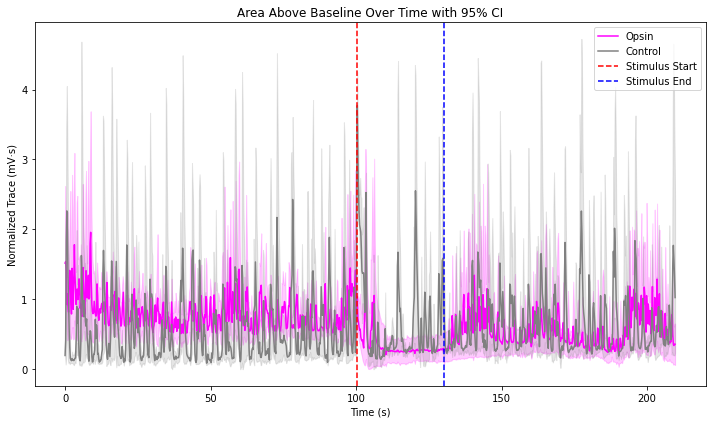

Plot saved as SVG at: C:\Maha\DATA\patch_clamp\Kevin\synaptic_connectivity\pre_post_integrals_plot.svg


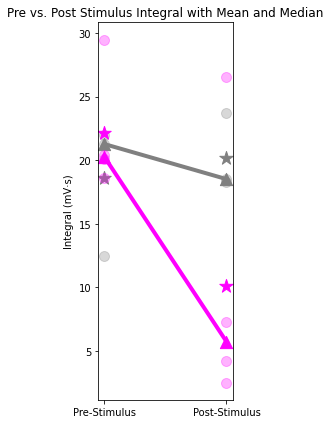

Plot saved as SVG at: C:\Maha\DATA\patch_clamp\Kevin\synaptic_connectivity\pre_post_integrals_plot.svg

Statistics for Control:
Pre-Stimulus Mean: 18.564834406537543, Median: 21.271601821902017, SEM: 3.0522345792373233
Post-Stimulus Mean: 20.165454254154707, Median: 18.51481021118576, SEM: 1.7548540297395823
Paired t-test: t = -0.6155619266986804, p = 0.600899609842112

Statistics for Opsin:
Pre-Stimulus Mean: 22.163608093250893, Median: 20.268684486377097, SEM: 2.4724375339523657
Post-Stimulus Mean: 10.136543949118257, Median: 5.738539916981551, SEM: 5.563202701816009
Paired t-test: t = 3.740732422441482, p = 0.03332777280672863


In [70]:
import os
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

# Define the directories
opsin_root = r'C:\Maha\DATA\patch_clamp\Kevin\synaptic_connectivity\opsin'
control_root = r'C:\Maha\DATA\patch_clamp\Kevin\synaptic_connectivity\control'

# Function to load and normalize CSVs from a directory, treating each CSV as a unique trial
def load_and_normalize_csvs(root_dir, group_label):
    csv_files = glob.glob(os.path.join(root_dir, '**', 'integral_over_time.csv'), recursive=True)
    combined_df = pd.DataFrame()

    for i, csv_file in enumerate(csv_files):
        df = pd.read_csv(csv_file)
        trial_name = f"Trial_{i+1}"  # Create a unique trial name based on the file order
        df['Trial'] = trial_name  # Assign the unique Trial ID
        df['Group'] = group_label  # Assign the group label

        # Normalize to ensure no negative values
        df['Normalized Trace'] = df['Area Above Baseline (mV·s)'] - df['Area Above Baseline (mV·s)'].min()

        combined_df = pd.concat([combined_df, df], axis=0)
    
    return combined_df

# Load and normalize CSVs for opsin and control
opsin_data = load_and_normalize_csvs(opsin_root, 'Opsin')
control_data = load_and_normalize_csvs(control_root, 'Control')

# Combine the opsin and control data
combined_data = pd.concat([opsin_data, control_data])

# Define stimulus start and end times
stim_start = 100.25  # Stimulus start time (seconds)
stim_end = stim_start + 30  # 30 seconds after stimulus start

# Calculate the integral 30s pre and post stimulus for each trial
def calculate_integrals(group_data):
    pre_integrals = []
    post_integrals = []

    for trial in group_data['Trial'].unique():
        trial_data = group_data[group_data['Trial'] == trial]

        # Pre-stimulus integral
        pre_stim_data = trial_data[(trial_data['Time (s)'] >= stim_start - 30) & (trial_data['Time (s)'] < stim_start)]
        pre_integral = np.trapz(pre_stim_data['Normalized Trace'], pre_stim_data['Time (s)'])
        pre_integrals.append(pre_integral)

        # Post-stimulus integral
        post_stim_data = trial_data[(trial_data['Time (s)'] >= stim_start) & (trial_data['Time (s)'] < stim_end)]
        post_integral = np.trapz(post_stim_data['Normalized Trace'], post_stim_data['Time (s)'])
        post_integrals.append(post_integral)

    return pd.DataFrame({'Trial': group_data['Trial'].unique(), 'Pre-Stimulus': pre_integrals, 'Post-Stimulus': post_integrals})

# Calculate and save integrals for opsin and control groups
opsin_integrals = calculate_integrals(opsin_data)
control_integrals = calculate_integrals(control_data)

opsin_integrals.to_csv(os.path.join(opsin_root, 'opsin_pre_post_integrals.csv'), index=False)
control_integrals.to_csv(os.path.join(control_root, 'control_pre_post_integrals.csv'), index=False)

# Plot the results using Seaborn's lineplot with CI
plt.figure(figsize=(10, 6))
sns.lineplot(data=combined_data, x='Time (s)', y='Normalized Trace', hue='Group', ci=95, 
             palette={'Opsin': 'magenta', 'Control': 'grey'})

# Add vertical lines for stimulus start and end
plt.axvline(x=stim_start, color='red', linestyle='--', label='Stimulus Start')
plt.axvline(x=stim_end, color='blue', linestyle='--', label='Stimulus End')

plt.title('Area Above Baseline Over Time with 95% CI')
plt.xlabel('Time (s)')
plt.ylabel('Normalized Trace (mV·s)')
plt.legend()
plt.grid(False)
plt.tight_layout()

# Save the plot as an SVG file
#output_svg_path = r'C:\Maha\DATA\manuscript_figures\fig_4\graphs\area_above_baseline_plot.svg'
#plt.savefig(output_svg_path, format='svg')
plt.show()

print(f"Plot saved as SVG at: {output_svg_path}")

# Plot the pre and post data for each trial as scatter dots, with mean and median
plt.figure(figsize=(3, 6))

for group, color in zip(['Control', 'Opsin'], ['grey', 'magenta']):
    group_data = control_integrals if group == 'Control' else opsin_integrals

    for _, row in group_data.iterrows():
        plt.scatter(['Pre-Stimulus', 'Post-Stimulus'], 
                    [row['Pre-Stimulus'], row['Post-Stimulus']], 
                    color=color, alpha=0.3, s=100)  # Set alpha to 0.3 for more transparency

    # Plot the median as a thick line
    median_pre = group_data['Pre-Stimulus'].median()
    median_post = group_data['Post-Stimulus'].median()
    plt.plot(['Pre-Stimulus', 'Post-Stimulus'], [median_pre, median_post], 
             color=color, linewidth=4, label=f'{group} Median')

    # Plot mean as star and median as triangle
    mean_pre = group_data['Pre-Stimulus'].mean()
    mean_post = group_data['Post-Stimulus'].mean()

    plt.scatter(['Pre-Stimulus', 'Post-Stimulus'], [mean_pre, mean_post], 
                color=color, marker='*', s=200, label=f'{group} Mean')

    plt.scatter(['Pre-Stimulus', 'Post-Stimulus'], [median_pre, median_post], 
                color=color, marker='^', s=150)  # No need to relabel median

# Add legend and labels
plt.title('Pre vs. Post Stimulus Integral with Mean and Median')
plt.ylabel('Integral (mV·s)')
#plt.legend(loc='best')
plt.tight_layout()


# Save the plot
output_svg_path = os.path.join(os.path.dirname(opsin_root), 'pre_post_integrals_plot.svg')
plt.savefig(output_svg_path, format='svg')
plt.show()

print(f"Plot saved as SVG at: {output_svg_path}")

# Statistics: Mean, Median, SEM, and paired t-test for pre and post within each group
for group, integrals in zip(['Control', 'Opsin'], [control_integrals, opsin_integrals]):
    
    pre_values = integrals['Pre-Stimulus']
    post_values = integrals['Post-Stimulus']
    
    mean_pre = pre_values.mean()
    mean_post = post_values.mean()
    
    median_pre = pre_values.median()
    median_post = post_values.median()
    
    sem_pre = stats.sem(pre_values)
    sem_post = stats.sem(post_values)
    
    t_stat, p_value = stats.ttest_rel(pre_values, post_values)
    
    print(f"\nStatistics for {group}:")
    print(f"Pre-Stimulus Mean: {mean_pre}, Median: {median_pre}, SEM: {sem_pre}")
    print(f"Post-Stimulus Mean: {mean_post}, Median: {median_post}, SEM: {sem_post}")
    print(f"Paired t-test: t = {t_stat}, p = {p_value}")


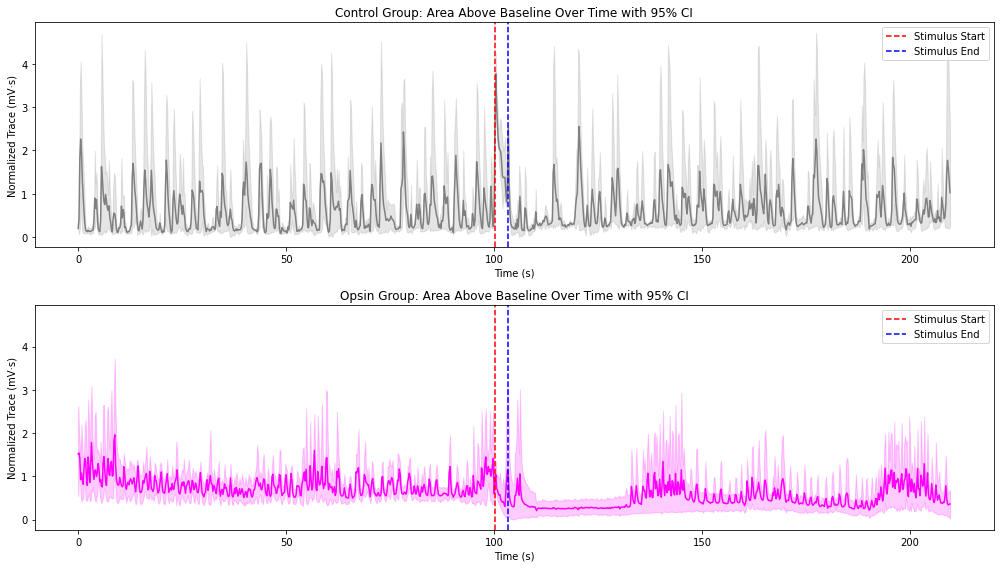

Plot saved as SVG at: C:\Maha\DATA\manuscript_figures\fig_4\graphs\area_above_baseline_subplots_ci_mean_same_scale.svg


In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with two subplots
plt.figure(figsize=(14, 8))

# First subplot for Control group
plt.subplot(2, 1, 1)
sns.lineplot(
    data=combined_data[combined_data['Group'] == 'Control'], 
    x='Time (s)', 
    y='Normalized Trace', 
    ci=95, 
    estimator='mean', 
    color='gray'
)
plt.axvline(x=stim_start, color='red', linestyle='--', label='Stimulus Start')
plt.axvline(x=stim_end, color='blue', linestyle='--', label='Stimulus End')
plt.title('Control Group: Area Above Baseline Over Time with 95% CI')
plt.ylabel('Normalized Trace (mV·s)')
plt.legend()
plt.grid(False)

# Second subplot for Opsin group
plt.subplot(2, 1, 2)
sns.lineplot(
    data=combined_data[combined_data['Group'] == 'Opsin'], 
    x='Time (s)', 
    y='Normalized Trace', 
    ci=95, 
    estimator='mean', 
    color='magenta'
)
plt.axvline(x=stim_start, color='red', linestyle='--', label='Stimulus Start')
plt.axvline(x=stim_end, color='blue', linestyle='--', label='Stimulus End')
plt.title('Opsin Group: Area Above Baseline Over Time with 95% CI')
plt.xlabel('Time (s)')
plt.ylabel('Normalized Trace (mV·s)')
plt.legend()
plt.grid(False)

# Adjust y-axis limits to be the same across both subplots
y_min = min(plt.subplot(2, 1, 1).get_ylim()[0], plt.subplot(2, 1, 2).get_ylim()[0])
y_max = max(plt.subplot(2, 1, 1).get_ylim()[1], plt.subplot(2, 1, 2).get_ylim()[1])

plt.subplot(2, 1, 1).set_ylim(y_min, y_max)
plt.subplot(2, 1, 2).set_ylim(y_min, y_max)

# Adjust layout so subplots don't overlap
plt.tight_layout()

# Save the plot as an SVG file
output_svg_path = r'C:\Maha\DATA\manuscript_figures\fig_4\graphs\area_above_baseline_subplots_ci_mean_same_scale.svg'
plt.savefig(output_svg_path, format='svg')
plt.show()

print(f"Plot saved as SVG at: {output_svg_path}")


# trace generation

In [ ]:
import pyabf
import numpy as np
import matplotlib.pyplot as plt
import os

# Load the pre, stim, and post ABF files
pre_file_path = r'C:\Maha\DATA\patch_clamp\Kevin\synaptic_connectivity\opsin\160424\24416011.abf'  # Update with your pre file path
stim_file_path = r'C:\Maha\DATA\patch_clamp\Kevin\synaptic_connectivity\opsin\160424\24416012.abf'  # Update with your stim file path
post_file_path = r'C:\Maha\DATA\patch_clamp\Kevin\synaptic_connectivity\opsin\160424\24416013.abf'  # Update with your post file path

# Function to concatenate all sweeps from a given ABF file
def concatenate_sweeps(abf_file_path):
    abf = pyabf.ABF(abf_file_path)
    concatenated_trace = []
    concatenated_time = []

    for sweepNumber in range(abf.sweepCount):
        abf.setSweep(sweepNumber)
        concatenated_trace.append(abf.sweepY)
        concatenated_time.append(abf.sweepX + (abf.sweepX[-1] * sweepNumber))  # Adjust time for concatenation

    return np.concatenate(concatenated_time), np.concatenate(concatenated_trace)

# Concatenate all sweeps for pre and post
pre_time, pre_trace = concatenate_sweeps(pre_file_path)
post_time, post_trace = concatenate_sweeps(post_file_path)

# Load the stim trace (assuming it has only one sweep)
stim_abf = pyabf.ABF(stim_file_path)
stim_abf.setSweep(0)
stim_time = stim_abf.sweepX + pre_time[-1]  # Adjust time to continue from end of pre
stim_trace = stim_abf.sweepY

# Adjust post time to continue from the end of stim
post_time += stim_time[-1]

# Combine pre, stim, and post traces
combined_time = np.concatenate([pre_time, stim_time, post_time])
combined_trace = np.concatenate([pre_trace, stim_trace, post_trace])

# Plot the combined trace
plt.figure(figsize=(12, 6))
plt.plot(combined_time, combined_trace, color='turquoise')
plt.title('Combined Trace: Pre, Stim, Post')
plt.xlabel('Time (s)')
plt.ylabel('Voltage (mV)')
plt.tight_layout()


# Save the combined trace plot
#output_path = r'C:\Maha\DATA\patch_clamp\Kevin\synaptic_connectivity\100624_F2_C1\CC\t2' # Update with your output directory
#plt.savefig(os.path.join(output_path, 'combined_trace.png'))
#plt.savefig(os.path.join(output_path, 'combined_trace.pdf'))
plt.show()

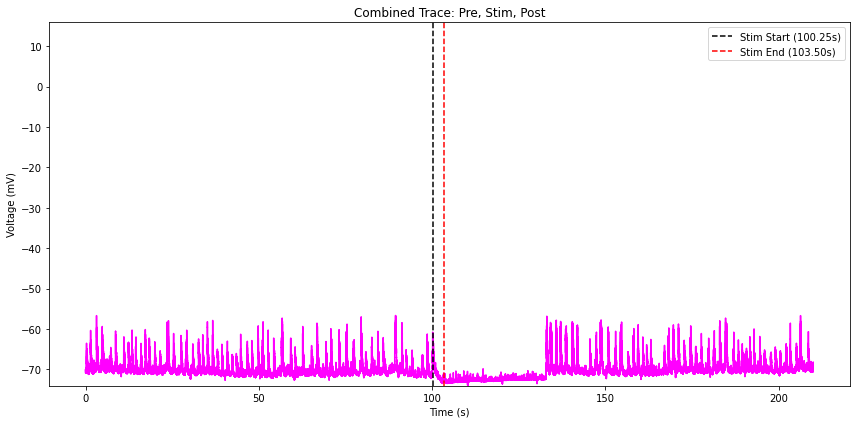

C:\Users\m.dhanasekar\AppData\Local\Temp\ipykernel_3216\3778815742.py:40: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()


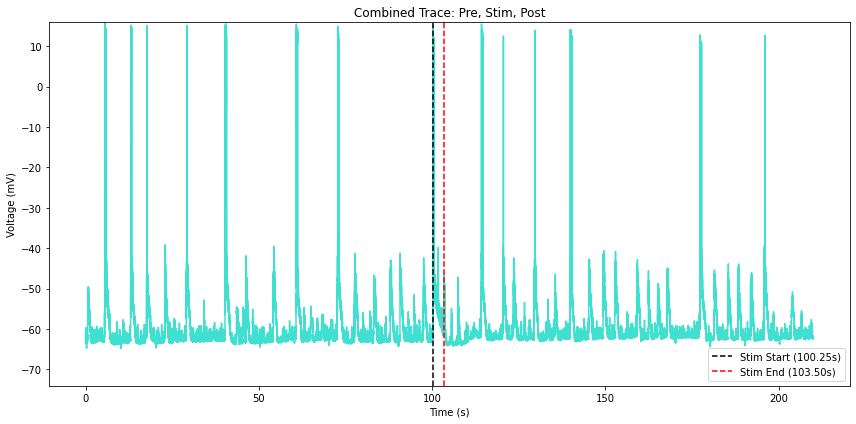

Plots saved as SVG files.


In [86]:
# Calculate the global y-axis limits based on both combined traces
global_y_min = min(np.min(combined_trace), np.min(combined_trace_o))
global_y_max = max(np.max(combined_trace), np.max(combined_trace_o))

# First plot in magenta
plt.figure(figsize=(12, 6))
plt.plot(combined_time_o, combined_trace_o, color='magenta')  # Plot in magenta
plt.axvline(x=100.25, color='black', linestyle='--', label='Stim Start (100.25s)')  # Vline for stim start
plt.axvline(x=103.50, color='red', linestyle='--', label='Stim End (103.50s)')  # Vline for stim end
plt.title('Combined Trace: Pre, Stim, Post')

# Apply consistent y-axis limits

plt.ylim(global_y_min, global_y_max)

plt.xlabel('Time (s)')
plt.ylabel('Voltage (mV)')
plt.legend()
plt.tight_layout()

# Save the combined trace plot
output_path = r'C:\Maha\DATA\patch_clamp\Kevin\synaptic_connectivity\140524_F1_C1\CC\t1'
plt.savefig(r'C:\Maha\DATA\manuscript_figures\fig_4\graphs\combined_trace_vlines_magenta.svg')
plt.show()

# Second plot in turquoise
plt.figure(figsize=(12, 6))
plt.plot(combined_time, combined_trace, color='turquoise')  # Plot in turquoise
plt.axvline(x=100.25, color='black', linestyle='--', label='Stim Start (100.25s)')  # Vline for stim start
plt.axvline(x=103.50, color='red', linestyle='--', label='Stim End (103.50s)')  # Vline for stim end
plt.title('Combined Trace: Pre, Stim, Post')

# Apply consistent y-axis limits

plt.ylim(global_y_min, global_y_max)

plt.xlabel('Time (s)')
plt.ylabel('Voltage (mV)')
plt.legend()
plt.tight_layout()

# Save the combined trace plot
plt.savefig(r'C:\Maha\DATA\manuscript_figures\fig_4\graphs\combined_trace_vlines_turquoise.svg')
plt.show()

print(f"Plots saved as SVG files.")


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate the global y-axis limits based on both combined traces
global_y_min = min(np.min(combined_trace), np.min(combined_trace_o))
global_y_max = max(np.max(combined_trace), np.max(combined_trace_o))

# First plot in magenta
plt.figure(figsize=(12, 6))
plt.plot(combined_time_o, combined_trace_o, color='magenta')  # Plot in magenta
plt.axvline(x=100.25, color='black', linestyle='--', label='Stim Start (100.25s)')  # Vline for stim start
plt.axvline(x=103.50, color='red', linestyle='--', label='Stim End (103.50s)')  # Vline for stim end
plt.title('Combined Trace: Pre, Stim, Post')

# Apply consistent y-axis limits
plt.xlim(90, 140)
plt.ylim(global_y_min, global_y_max)

plt.xlabel('Time (s)')
plt.ylabel('Voltage (mV)')
plt.legend()
plt.tight_layout()

# Save the combined trace plot
output_path = r'C:\Maha\DATA\patch_clamp\Kevin\synaptic_connectivity\140524_F1_C1\CC\t1'
plt.savefig(r'C:\Maha\DATA\manuscript_figures\fig_4\graphs\combined_trace_vlines_magenta_zoom.svg')
plt.show()

# Second plot in turquoise
plt.figure(figsize=(12, 6))
plt.plot(combined_time, combined_trace, color='turquoise')  # Plot in turquoise
plt.axvline(x=100.25, color='black', linestyle='--', label='Stim Start (100.25s)')  # Vline for stim start
plt.axvline(x=103.50, color='red', linestyle='--', label='Stim End (103.50s)')  # Vline for stim end
plt.title('Combined Trace: Pre, Stim, Post')

# Apply consistent y-axis limits
plt.xlim(90, 140)
plt.ylim(global_y_min, global_y_max)

plt.xlabel('Time (s)')
plt.ylabel('Voltage (mV)')
plt.legend()
plt.tight_layout()

# Save the combined trace plot
plt.savefig(r'C:\Maha\DATA\manuscript_figures\fig_4\graphs\combined_trace_vlines_turquoise_zoom.svg')
plt.show()

print(f"Plots saved as SVG files.")